# Objective: How to Create Insert/Zoom Plot from Astronomical FITS Image?

Step 1: Download SDSS FITS image file

Step 2: Import Required Library

In [1]:
import numpy as np #deals with nums ans arrays
import matplotlib.pyplot as plt #data visualization
from astropy.io import fits #fits file handling
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset # inset plotting

Step 3: Read FITS image file

In [2]:
file = fits.open('frame-u-005071-3-0347.fits.bz2')
file.info()

Filename: frame-u-005071-3-0347.fits.bz2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


Step-4: Extract image data

In [3]:
image_data = file[0].data
image_data, image_data.shape

(array([[ 0.01316833,  0.04064941,  0.03149414, ...,  0.0222168 ,
          0.06713867, -0.04974365],
        [ 0.03149414,  0.05895996,  0.04064941, ..., -0.00476074,
         -0.00476074,  0.00423431],
        [-0.06933594,  0.04980469,  0.05895996, ...,  0.04919434,
         -0.00476074,  0.03121948],
        ...,
        [-0.05108643,  0.01304626,  0.00387955, ...,  0.02206421,
          0.01307678, -0.02288818],
        [ 0.00387955,  0.02218628, -0.03277588, ...,  0.00408173,
          0.00408173, -0.0229187 ],
        [-0.03277588,  0.01304626, -0.01443481, ..., -0.01390076,
          0.03106689,  0.03106689]], shape=(1489, 2048), dtype='>f4'),
 (1489, 2048))

Step-5: Ploting & visualize image data

/tmp/ipykernel_1237/1067439944.py:2: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image_data), origin='lower', cmap='jet')


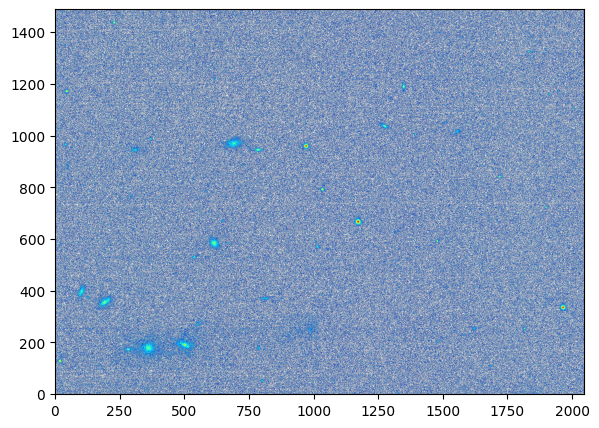

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log10(image_data), origin='lower', cmap='jet')
plt.show()

Step-6: Define the insert region, location, size

/tmp/ipykernel_1237/3171235336.py:2: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image_data), origin='lower', cmap='jet')
/tmp/ipykernel_1237/3171235336.py:11: RuntimeWarning: invalid value encountered in log10
  ax_inset.imshow(np.log10(image_data), origin='lower', cmap='jet')


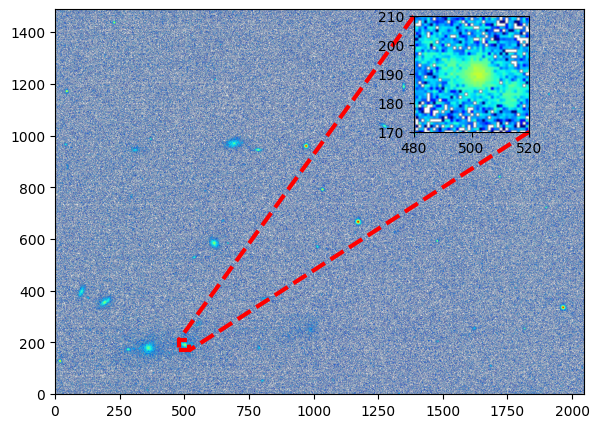

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log10(image_data), origin='lower', cmap='jet')
ax_inset = inset_axes(ax, width="40%", height="30%", loc='upper right')
#choose inset region 
xc,yc=500, 190
box_size = 20
x1, x2=xc-box_size, xc+box_size
y1, y2=yc-box_size, yc+box_size
x1,x2,y1,y2

ax_inset.imshow(np.log10(image_data), origin='lower', cmap='jet')
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)


mark_inset(ax,ax_inset, loc1=2, loc2=4,fc='none', ec='r', lw=3, ls ='--')
plt.show()

Step-7: PLot the zoomed in region in the insert

Step-8: Mark the zoomed region on the plot

Step-9: Create multiple regions inset image

/tmp/ipykernel_1237/647273395.py:17: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image_data), origin='lower', cmap='jet')
/tmp/ipykernel_1237/647273395.py:18: RuntimeWarning: invalid value encountered in log10
  ax_inset.imshow(np.log10(image_data), origin='lower', cmap='jet')


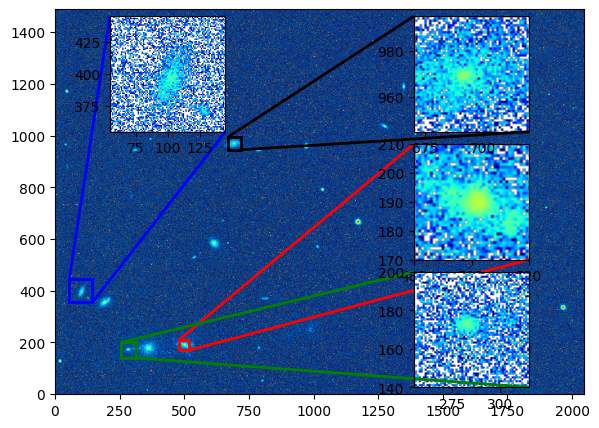

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
# ax.imshow(np.log10(image_data), origin='lower', cmap='jet')
# ax_inset = inset_axes(ax, width="40%", height="30%", loc='upper right')
#choose 4 inset region 
regions=[(500, 190),(100,400),(285, 170),(695,970)] 
# xc,yc=500, 190
box_sizes = np.array([20, 45, 30, 25])
insert_locations=['center right','upper left','lower right', 'upper right']
edge_colors=['r','b','g','k']

# use for loop
for i,((xc,yc),box_sizes, insert_locations, edge_colors) in enumerate(zip(regions, box_sizes, insert_locations, edge_colors)):
    x1, x2=xc-box_sizes, xc+box_sizes
    y1, y2=yc-box_sizes, yc+box_sizes
    # x1,x2,y1,y2
    ax_inset = inset_axes(ax, width="40%", height="30%", loc=insert_locations)
    ax.imshow(np.log10(image_data), origin='lower', cmap='jet')
    ax_inset.imshow(np.log10(image_data), origin='lower', cmap='jet')
    
    ax_inset.set_xlim(x1, x2)
    ax_inset.set_ylim(y1, y2)


    mark_inset(ax,ax_inset, loc1=2, loc2=4,fc='none', ec=edge_colors, lw=2, ls ='solid')
plt.show()